<a href="https://colab.research.google.com/github/AvichalTrivedi7/Generative-AI-Intel-Unnati/blob/main/Next_Word_Prediction_Gen_AI_Practice_8_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup & Raw Text
# Shows TensorFlow version and defines a tiny sample corpus.

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# --- Raw text (very small example so training is fast and easy to understand) ---
corpus = [
    "data science is fun",
    "i love data and ai",
    "machine learning and data science",
    "deep learning enables ai",
    "ai and data science are related",
    "practice makes perfect in data science",
    "learn ai by doing projects",
    "models learn from data",
    "predict the next word with a model",
]

TensorFlow version: 2.19.0


In [2]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) + 1  # +1 for padding / zero index

print("Total unique tokens (including OOV):", total_words)
print("Some token mappings (first 20):")
for i, (w, idx) in enumerate(word_index.items()):
    print(w, "->", idx)
    if i >= 19: break

# Showing basic conversion example
example = "data science is fun"
print("\nExample sequence:", tokenizer.texts_to_sequences([example])[0])


Total unique tokens (including OOV): 33
Some token mappings (first 20):
<OOV> -> 1
data -> 2
science -> 3
ai -> 4
and -> 5
learning -> 6
learn -> 7
is -> 8
fun -> 9
i -> 10
love -> 11
machine -> 12
deep -> 13
enables -> 14
are -> 15
related -> 16
practice -> 17
makes -> 18
perfect -> 19
in -> 20

Example sequence: [2, 3, 8, 9]


In [3]:
# Creating training sequences (n-gram style) and pad them
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    # create n-gram sequences: for line [w1,w2,w3] create [w1,w2], [w1,w2,w3]
    for i in range(1, len(token_list)):
        n_gram = token_list[: i+1]
        input_sequences.append(n_gram)

# Find max length and pad
max_seq_len = max([len(x) for x in input_sequences])
print("Max sequence length:", max_seq_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))
print("Example padded sequences (first 8):\n", input_sequences[:8])


Max sequence length: 7
Example padded sequences (first 8):
 [[ 0  0  0  0  0  2  3]
 [ 0  0  0  0  2  3  8]
 [ 0  0  0  2  3  8  9]
 [ 0  0  0  0  0 10 11]
 [ 0  0  0  0 10 11  2]
 [ 0  0  0 10 11  2  5]
 [ 0  0 10 11  2  5  4]
 [ 0  0  0  0  0 12  6]]


In [4]:
# Splitting into X (inputs) and y (labels)
X = input_sequences[:, :-1]   # all tokens except last
y = input_sequences[:, -1]    # the last token is the label (next word to predict)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("First X, y pair (as tokens):", X[0], y[0])


X shape: (37, 6)
y shape: (37,)
First X, y pair (as tokens): [0 0 0 0 0 2] 3


In [5]:
# Building a tiny model (Embedding + LSTM + Dense)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 32

model = Sequential([
    Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=X.shape[1]),
    LSTM(64),
    Dense(total_words, activation='softmax')   # predict distribution over vocabulary
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
# Keeping epochs small for quick runs; will increase if better fit is needed.
epochs = 100
history = model.fit(X, y, epochs=epochs, verbose=2)
# history contains loss and accuracy per epoch


Epoch 1/100
2/2 - 2s - 1s/step - accuracy: 0.0270 - loss: 3.4968
Epoch 2/100
2/2 - 0s - 26ms/step - accuracy: 0.1351 - loss: 3.4899
Epoch 3/100
2/2 - 0s - 24ms/step - accuracy: 0.1351 - loss: 3.4849
Epoch 4/100
2/2 - 0s - 24ms/step - accuracy: 0.2432 - loss: 3.4794
Epoch 5/100
2/2 - 0s - 25ms/step - accuracy: 0.2432 - loss: 3.4736
Epoch 6/100
2/2 - 0s - 24ms/step - accuracy: 0.2432 - loss: 3.4679
Epoch 7/100
2/2 - 0s - 27ms/step - accuracy: 0.2432 - loss: 3.4611
Epoch 8/100
2/2 - 0s - 24ms/step - accuracy: 0.2162 - loss: 3.4543
Epoch 9/100
2/2 - 0s - 25ms/step - accuracy: 0.2162 - loss: 3.4470
Epoch 10/100
2/2 - 0s - 27ms/step - accuracy: 0.2162 - loss: 3.4384
Epoch 11/100
2/2 - 0s - 24ms/step - accuracy: 0.2162 - loss: 3.4291
Epoch 12/100
2/2 - 0s - 24ms/step - accuracy: 0.2162 - loss: 3.4191
Epoch 13/100
2/2 - 0s - 31ms/step - accuracy: 0.2162 - loss: 3.4053
Epoch 14/100
2/2 - 0s - 24ms/step - accuracy: 0.1622 - loss: 3.3897
Epoch 15/100
2/2 - 0s - 24ms/step - accuracy: 0.1622 - loss

In [7]:
# Predict next word using a seed text
# Building reverse mapping
reverse_word_index = {idx: word for word, idx in tokenizer.word_index.items()}

def predict_next_word(model, tokenizer, seed_text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    pred = model.predict(token_list, verbose=0)      # shape (1, total_words)
    predicted_idx = np.argmax(pred, axis=-1)[0]
    return reverse_word_index.get(predicted_idx, "<UNK>")

# Try predictions
seeds = [
    "data science",
    "i love",
    "learn ai by",
    "models learn"
]
for s in seeds:
    next_word = predict_next_word(model, tokenizer, s, max_seq_len)
    print(f"Seed: '{s}' -> Next word predicted: '{next_word}'")


Seed: 'data science' -> Next word predicted: 'and'
Seed: 'i love' -> Next word predicted: 'data'
Seed: 'learn ai by' -> Next word predicted: 'ai'
Seed: 'models learn' -> Next word predicted: 'data'


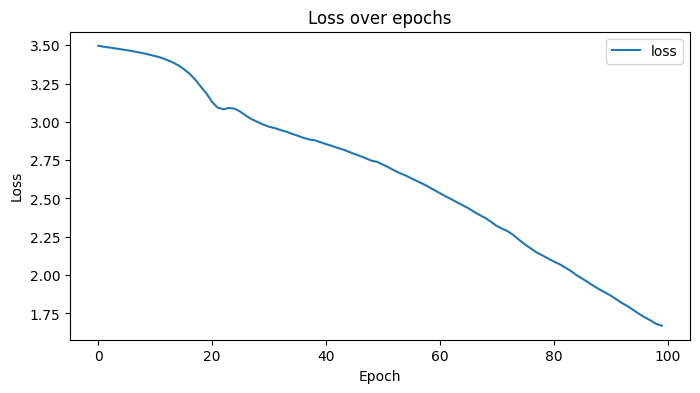

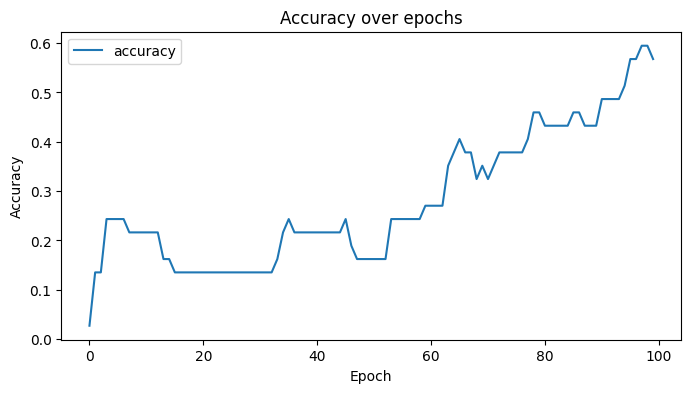

Saved model to next_word_model.h5


In [8]:
# Plotting training curves and saving the model
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save model (optional)
model.save("next_word_model.h5")
print("Saved model to next_word_model.h5")
